# Covid-19 Prediction - Analysis

## Import necessary modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.metrics import plot_precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score, average_precision_score

## Load Data

In [2]:
df = pd.read_csv(r"cov/covid.csv")

## Explore Data

In [3]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,Contact_with_Confirmed,corona_result
0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0,0


In [4]:
print('Total no. of samples of Sample data =', df.shape[0])
print('Total no. of features of Sample data =', df.shape[1])

Total no. of samples of Sample data = 679
Total no. of features of Sample data = 9


In [5]:
print('Total no. of elements of Sample data =', df.size)

Total no. of elements of Sample data = 6111


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cough                   679 non-null    int64
 1   fever                   679 non-null    int64
 2   sore_throat             679 non-null    int64
 3   shortness_of_breath     679 non-null    int64
 4   head_ache               679 non-null    int64
 5   age_60_and_above        679 non-null    int64
 6   gender                  679 non-null    int64
 7   Contact_with_Confirmed  679 non-null    int64
 8   corona_result           679 non-null    int64
dtypes: int64(9)
memory usage: 47.9 KB


In [7]:
df.describe(include='all')

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,Contact_with_Confirmed,corona_result
count,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00
mean,0.05,0.03,0.03,0.00,0.05,0.13,0.50,0.08,0.13
std,0.21,0.17,0.17,0.04,0.21,0.33,0.50,0.28,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [8]:
df.corona_result.value_counts()

0    591
1     88
Name: corona_result, dtype: int64

### Visualizing the Tweets after Pre-processing

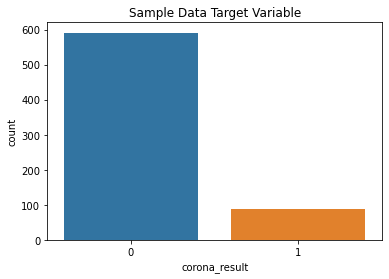

In [9]:
# Visualizations for the count of target variables
sns.countplot( x = "corona_result", data = df)
plt.title("Sample Data Target Variable")
plt.show()

#### The data is moderately biased and imbalanced

### Upsampling the data

In [10]:
#create two different dataframe of majority and minority class 
df_majority = df[(df['corona_result']==0)] 
df_minority = df[(df['corona_result']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples=len(df_majority), 
                                 random_state=42) 

# Combine majority class with upsampled minority class
df_processed = pd.concat([df_minority_upsampled, df_majority])

In [11]:
print('Total no. of samples of Upsampled data =', df_processed.shape[0])
print('Total no. of features of Upsampled data =', df_processed.shape[1])

Total no. of samples of Upsampled data = 1182
Total no. of features of Upsampled data = 9


In [12]:
print('Total no. of elements of Sample data =', df.size)

Total no. of elements of Sample data = 6111


In [13]:
df_processed['corona_result'].value_counts()

1    591
0    591
Name: corona_result, dtype: int64

### Visualizing the Tweets after Upsampling the data

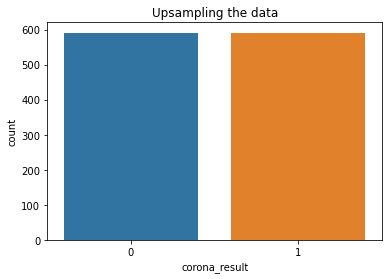

In [14]:
# Visualizations for the count of target variables
sns.countplot( x = "corona_result", data = df_processed)
plt.title("Upsampling the data")
plt.show()

# 1. Logistic Regression Model

In [15]:
X1 = df_processed.drop(["corona_result"], axis=1)
y1 = df_processed["corona_result"]

X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, 
                                                         test_size=0.25, 
                                                         random_state=42)

lor = LogisticRegression(penalty='l2', C=10.0)
lor.fit(X1_train, y1_train)
y1_pred = lor.predict(X1_test)

# 2. Random Forest Classifier Model 

In [16]:
X2 = df_processed.drop(["corona_result"], axis=1)
y2 = df_processed["corona_result"]

X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, 
                                                         test_size=0.25, 
                                                         random_state=42)

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X2_train, y2_train)
y2_pred = rfc.predict(X2_test)

# 3. KNeighbors Classifier Model

In [17]:
X3 = df_processed.drop(["corona_result"], axis=1)
y3 = df_processed["corona_result"]

X3_train, X3_test, y3_train, y3_test = train_test_split (X3, y3, 
                                                         test_size=0.25, 
                                                         random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X3_train, y3_train)
y3_pred = knn.predict(X3_test)

# 4. Decision Tree Classifier Model

In [18]:
X4 = df_processed.drop(["corona_result"], axis=1)
y4 = df_processed["corona_result"]

X4_train, X4_test, y4_train, y4_test = train_test_split (X4, y4, 
                                                         test_size=0.25, 
                                                         random_state=42, 
                                                         stratify=y4)

dtc = DecisionTreeClassifier()
dtc.fit(X4_train, y4_train)
y4_pred = dtc.predict(X4_test)

## Model Evaluation

In [19]:
X = df_processed.drop(["corona_result"], axis=1)
y = df_processed["corona_result"]

X_train, X_test, y_train, y_test = train_test_split ( X, y, 
                                                     test_size=0.25, 
                                                     random_state=42, 
                                                     stratify=y)

classifiers = { 
    "LOR": LogisticRegression(),
    "DTC": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

no_classifiers = len(classifiers.keys())

def classify(X_train, y_train, X_test, y_test, verbose = True):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 8)), 
                              columns = ['Classifier',
                                         'F2 Score',
                                         'Accuracy',
                                         'Precision',
                                         'Recall',
                                         'Avg Precision',
                                         'ROC',
                                         'Training time'])
    
    count = 0
    for key, classifier in classifiers.items():
        
        t_start = process_time()  
        classifier.fit(X_train, y_train)
        
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        
        y_pred = classifier.predict(X_test)
        
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'F2 Score'] = fbeta_score(y_test, y_pred, 
                                                       average='weighted', 
                                                       beta=2.0)
        df_results.loc[count,'Accuracy'] = accuracy_score(y_test, y_pred)
        df_results.loc[count,'Precision'] = precision_score(y_test, y_pred)
        df_results.loc[count,'Recall'] = recall_score(y_test, y_pred)
        df_results.loc[count,'Avg Precision'] = average_precision_score(y_test, y_pred)
        df_results.loc[count,'ROC'] = roc_auc_score(y_test, y_pred)
        df_results.loc[count,'Training time'] = t_elapsed
        
        count+=1

    return df_results

In [20]:
df_results = classify(X_train, y_train, X_test, y_test)
df_results.sort_values(by='F2 Score', ascending=False)

,Classifier,F2 Score,Accuracy,Precision,Recall,Avg Precision,ROC,Training time
1,DTC,0.66,0.68,0.90,0.41,0.66,0.68,0.00
2,RFC,0.66,0.68,0.88,0.41,0.66,0.68,0.33
0,LOR,0.63,0.65,0.85,0.37,0.63,0.65,0.06
3,KNN,0.63,0.63,0.60,0.77,0.58,0.63,0.00


### Plotting AUC-PR curve

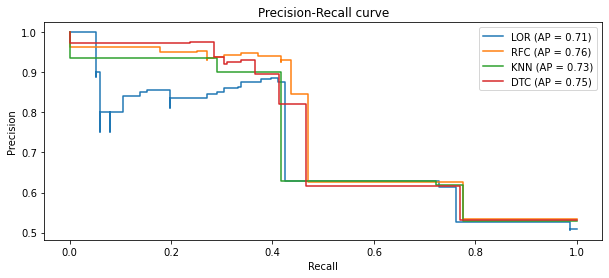

In [21]:
# Plot precision-recall curves
plt.figure(figsize=(10,4))

plot_precision_recall_curve(lor, X1_test, y1_test, ax = plt.gca(), name = "LOR")
plot_precision_recall_curve(rfc, X2_test, y2_test, ax = plt.gca(), name = "RFC")
plot_precision_recall_curve(knn, X3_test, y3_test, ax = plt.gca(), name = "KNN")
plot_precision_recall_curve(dtc, X4_test, y4_test, ax = plt.gca(), name = "DTC")

plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### Plotting ROC curve

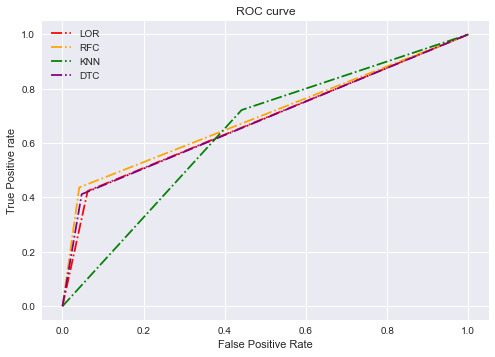

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr1, tpr1, thresh1 = roc_curve(y1_test, y1_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y2_test, y2_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y3_test, y3_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y4_test, y4_pred, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-.',color='red', label='LOR')
plt.plot(fpr2, tpr2, linestyle='-.',color='orange', label='RFC')
plt.plot(fpr3, tpr3, linestyle='-.',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='-.',color='purple', label='DTC')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

#### The best Model to be selected is Decision Tree Classifier

# Model

### Decision Tree Classifier

In [23]:
X4 = df_processed.drop(["corona_result"], axis=1)
y4 = df_processed["corona_result"]

X4_train, X4_test, y4_train, y4_test = train_test_split (X4, y4, 
                                                         test_size=0.25, 
                                                         random_state=42, 
                                                         stratify=y4)

dtc = DecisionTreeClassifier()
dtc.fit(X4_train, y4_train)
y4_pred = dtc.predict(X4_test)

In [24]:
# Printing Metric
accuracy_score = round(accuracy_score(y4_test, y4_pred), 2)
precision_score = round(precision_score(y4_test, y4_pred), 2)
recall_score = round(recall_score(y4_test, y4_pred), 2)
f2_score = round(fbeta_score(y4_test, y4_pred, 
                             average='weighted', 
                             beta=2.0), 2)
average_precision_score = round(average_precision_score(y4_test, y4_pred), 2)
roc_auc_score = round(roc_auc_score(y4_test, y4_pred), 2)

print("Metrics for DTC Model:")
print("Accuracy = ", accuracy_score)
print("Precision = ", precision_score)
print("Recall = ", recall_score)
print("F2 Score =", f2_score)
print("Avg Precision score = ", average_precision_score)
print("ROC score = ", roc_auc_score)

Metrics for DTC Model:
Accuracy =  0.68
Precision =  0.9
Recall =  0.41
F2 Score = 0.66
Avg Precision score =  0.66
ROC score =  0.68


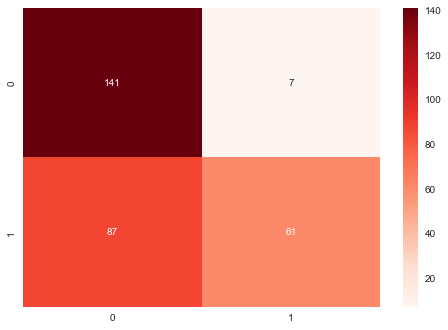

In [25]:
# calculating confusion matrix
cf_matrix = confusion_matrix(y4_test, y4_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.10g')

In [26]:
# printing classification report
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       148
           1       0.90      0.41      0.56       148

    accuracy                           0.68       296
   macro avg       0.76      0.68      0.66       296
weighted avg       0.76      0.68      0.66       296



### Viz of DT Graph

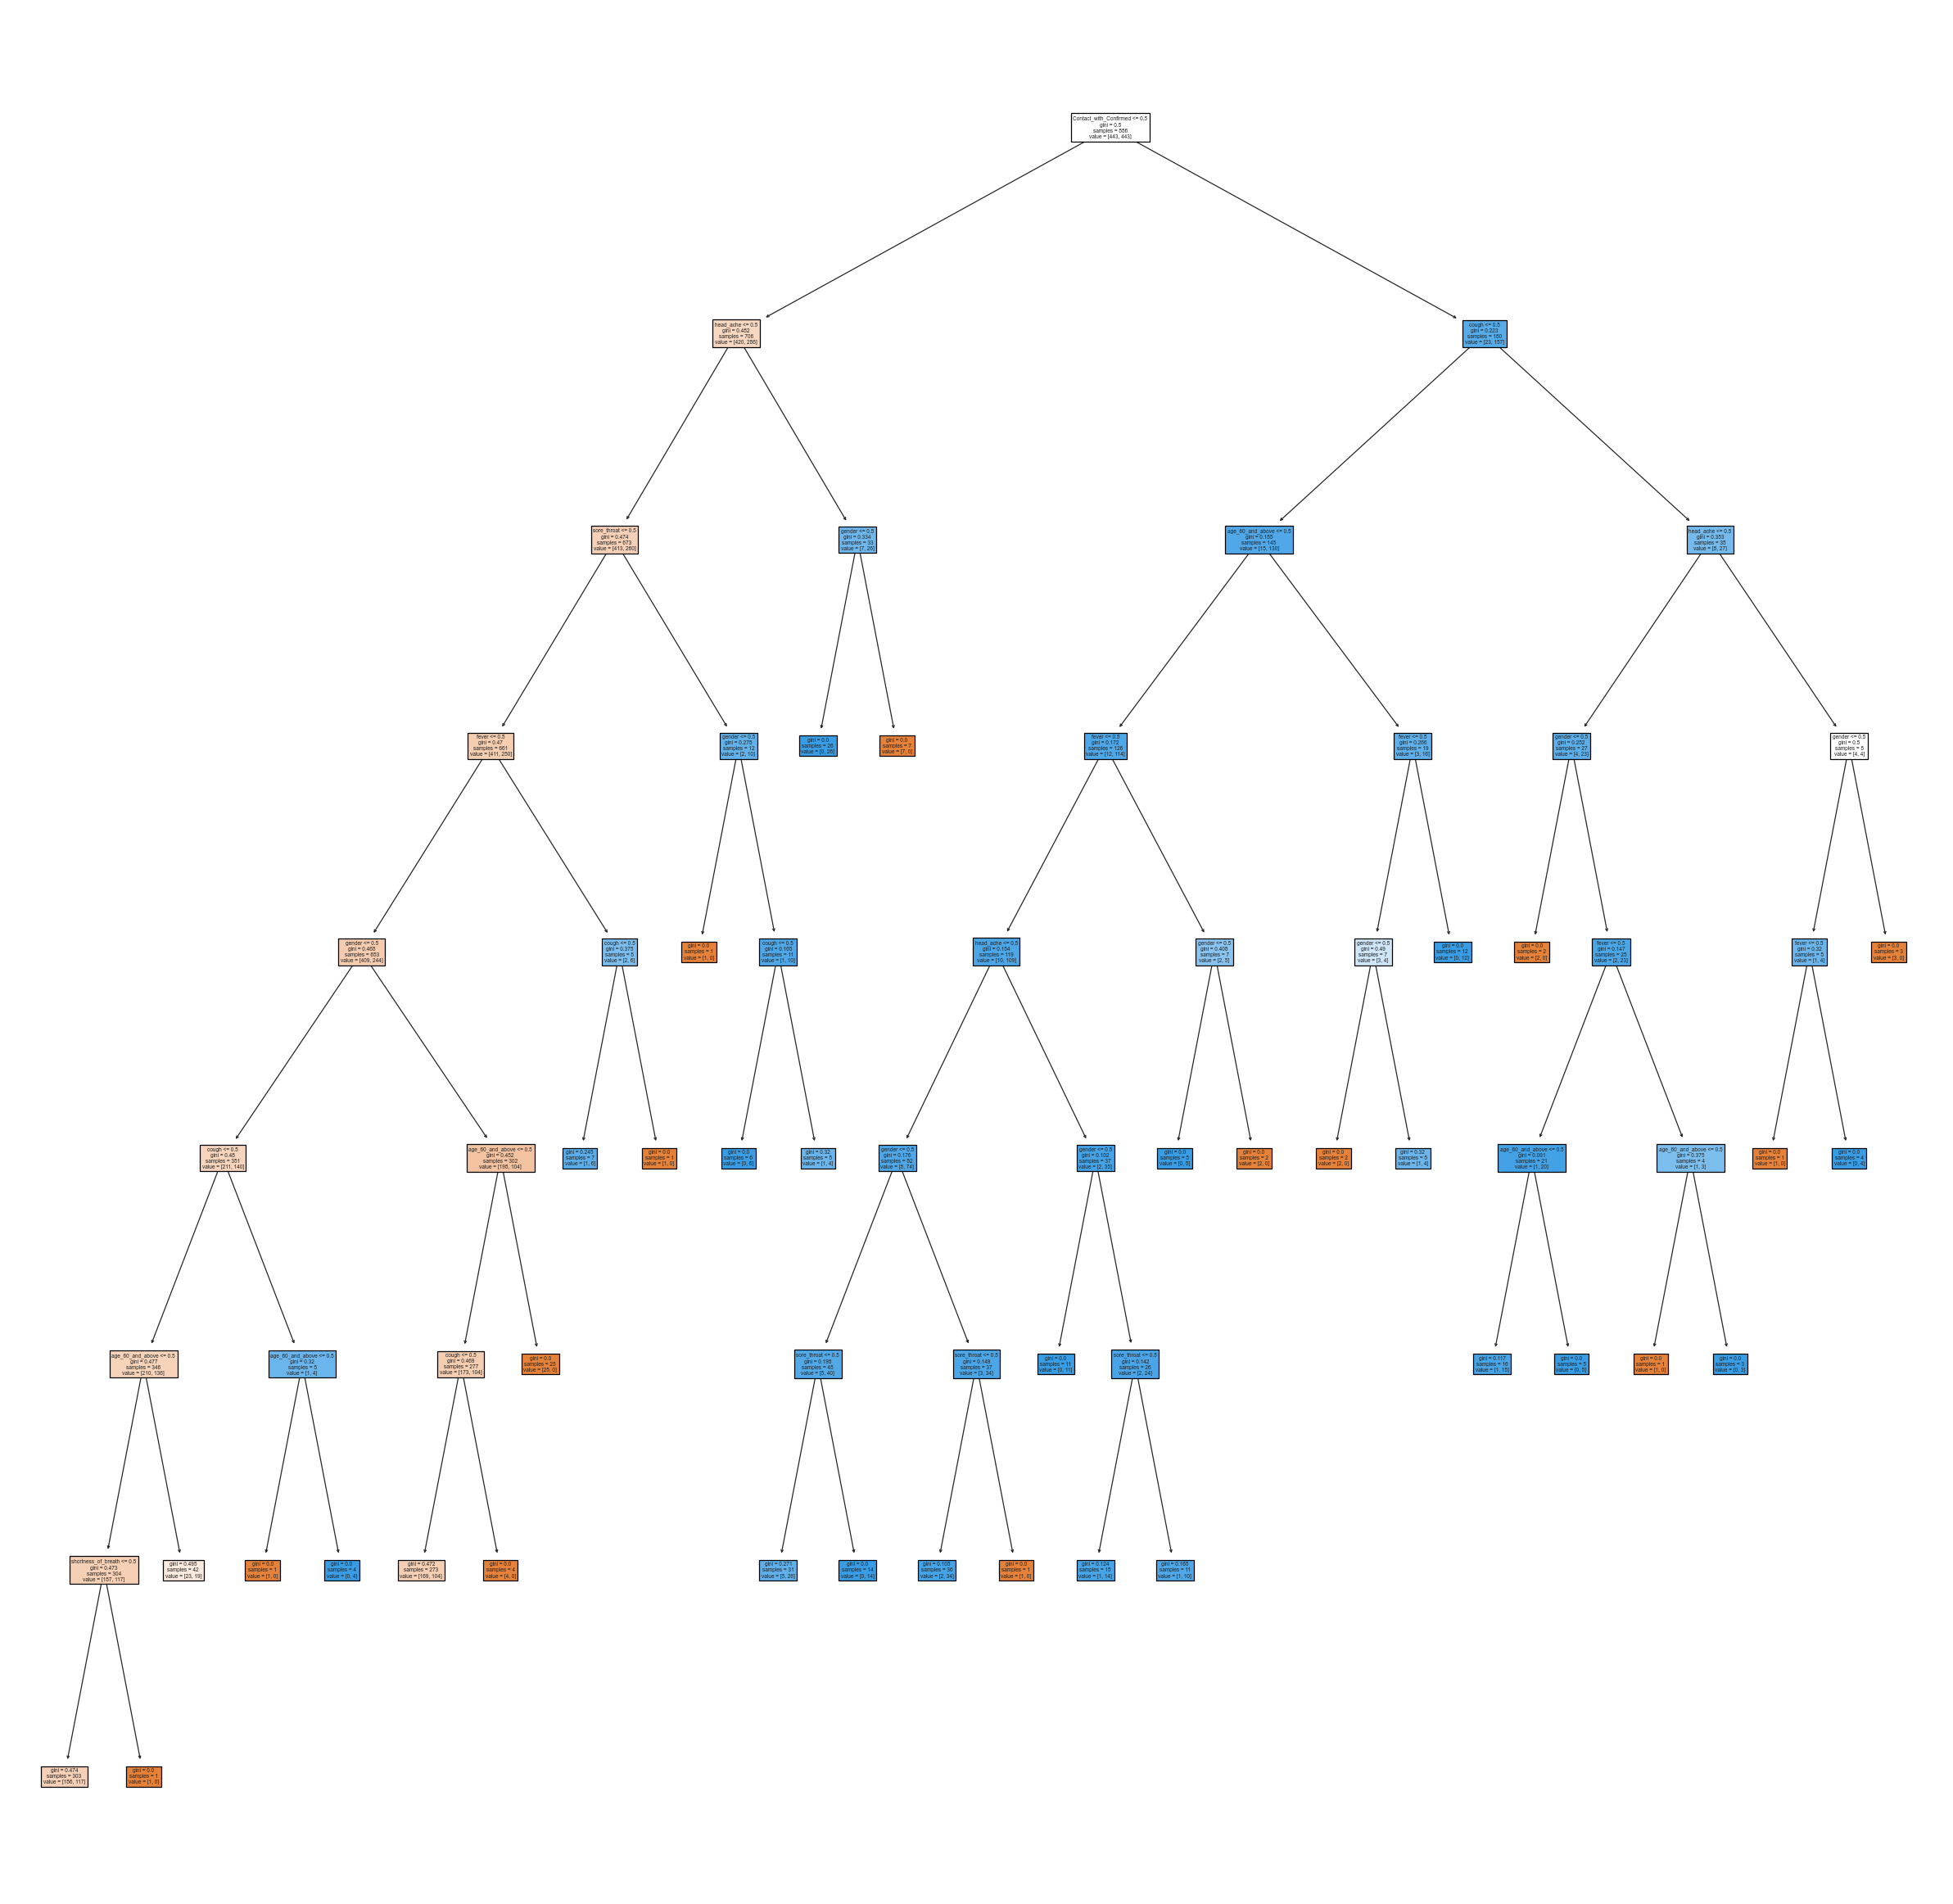

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dtc,
               feature_names = X4.columns.values, 
               filled = True);
fig.savefig('tree.png')